<a href="https://colab.research.google.com/github/Shrinjita/COLLEGE-WORK/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT 2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/weather_forecast.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Outlook'] + ' ' + df['Temperature'] + ' ' + df['Humidity'] + ' ' + df['Windy'])
y = df['Play'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into training and testing sets
X_train = X[:13]
X_test = X[13:]
y_train = y[:13]
y_test = y[13:]

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Custom prediction
custom_test = vectorizer.transform(['overcast mild high weak'])
custom_prediction = nb.predict(custom_test)
print("Prediction for Outlook=overcast, Temperature=mild, Humidity=high, Windy=weak:", 'yes' if custom_prediction[0] == 1 else 'no')


Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Prediction for Outlook=overcast, Temperature=mild, Humidity=high, Windy=weak: no


**EXPERIMENT 3**

In [ ]:
# Step 1- Import Data
import pandas as pd
import numpy as np
dib = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep learning/diabetes.csv')  # Import data
print(dib.shape)  # Understand shape of the dataframe
dib.head()  # Look at few rows

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check columns
print(dib.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Step 2: Feature Engineering
X = dib[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Feature variables
y = dib['Outcome']  # Response variable

In [ ]:
# Step 3: Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Step 4: Build a binary classification model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -245.19
Date:                Wed, 31 Jul 2024   Deviance:                       490.37
Time:                        08:50:35   Pearson chi2:                     667.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3158
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.3762      0.908    -10.328      0.000     -11.155      -7.597
Pregnancies                  0.1084      0.039      2.803      0.005       0.033       0.184
Glucose                      0.0373      0.005      7.973      0.000       0.028       0.046
BloodPressure               -0.0096      0.006     -1.566      0.117      -0.022       0.002
SkinThickness               -0.0004      0.008     -0.048      0.962      -0.017       0.016
Insulin                     -0.0012      0.001     -1.103      0.270      -0.003       0.001
BMI                          0.0952      0.018      5.197      0.000       0.059       0.131
DiabetesPedigreeFunction     1.3783      0.367      3.758      0.000       0.659       2.097
Age                          0.0202      0.011      1.809      0.070      -0.002       0.042
============================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm)  # Predict diabetes

In [ ]:
# Step 5: Predict Diabetes
# Create a new dataframe named dib_train which will include original and predicted diabetes
data = {col: X_train[col] for col in X_train.columns}
data['Diabetes'] = y_train
data['y_train_pred'] = y_train_pred
dib_train = pd.DataFrame(data)

# Create predicted diabetes based on a 0.5 cut-off probability
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
dib_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,y_train_pred,Diabetes_predicted
155,7,152,88,44,0,50.0,0.337,36,1,0.894943,1
150,1,136,74,50,204,37.4,0.399,24,0,0.360796,0
78,0,131,0,0,0,43.2,0.270,26,1,0.627636,1
9,8,125,96,0,0,0.0,0.232,54,1,0.033715,0
142,2,108,52,26,63,32.5,0.318,22,0,0.149560,0


In [ ]:
# Step 6: Confusion Matrix and Accuracy
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
confusion

array([[314,  36],
       [ 74, 113]])

In [ ]:
# Overall accuracy
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

0.7951582867783985


In [ ]:
# Step 7: Variation with Cut-Off
# Calculate Sensitivity, Specificity and accuracy with different probability cutoffs
numbers = [float(x) / 10 for x in range(10)]

for i in numbers:
    dib_train[i] = dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,y_train_pred,...,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,7,152,88,44,0,50.0,0.337,36,1,0.894943,...,1,1,1,1,1,1,1,1,1,0
150,1,136,74,50,204,37.4,0.399,24,0,0.360796,...,1,1,1,1,0,0,0,0,0,0
78,0,131,0,0,0,43.2,0.270,26,1,0.627636,...,1,1,1,1,1,1,1,0,0,0
9,8,125,96,0,0,0.0,0.232,54,1,0.033715,...,1,0,0,0,0,0,0,0,0,0
142,2,108,52,26,63,32.5,0.318,22,0,0.149560,...,1,1,0,0,0,0,0,0,0,0


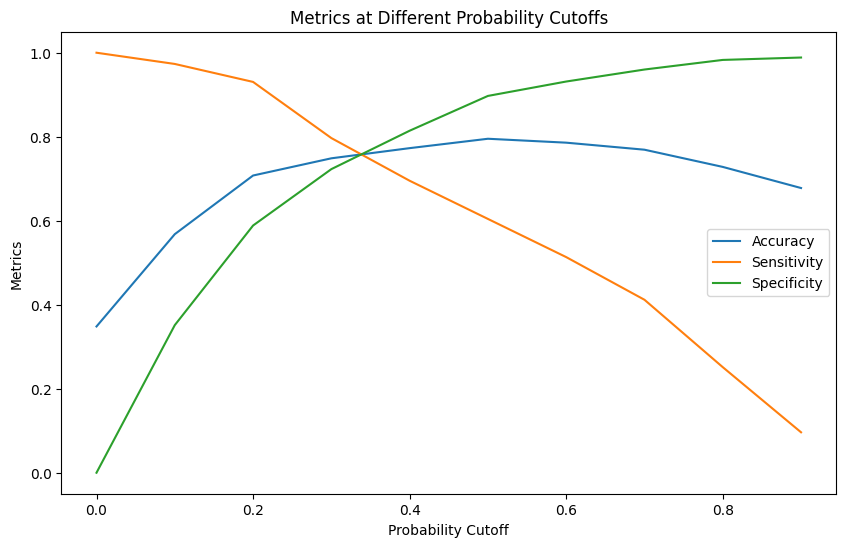

In [ ]:

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    Specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    Sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]
# Plot accuracy, sensitivity, and specificity for various probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Metrics at Different Probability Cutoffs')
plt.legend()
plt.show()

TRYOUT 2

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris=load_iris()
X=iris.data
Y=iris.target
print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 150
Accuracy score on training set is 0.9619047619047619
Accuracy score on test set is 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
iris=load_iris()
X=iris.data
Y=iris.target
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.94


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data
Y = iris.target
logreg = LogisticRegression(max_iter=200)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(logreg, X, Y, cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score: {}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score: 0.9733333333333334


When comparing different cross-validation techniques on the Iris dataset, each method offers unique advantages and potential insights into model performance. Here's an inference based on using these four methods:

1. **Hold Out Cross-Validation**:
    - **Method**: The dataset is split into two parts: training and testing. Typically, a common split is 80/20 or 70/30.
    - **Inference**: This method is simple and quick but can be subject to variability depending on the split. If the training and testing sets are not representative, the model performance might be misleading. It provides a snapshot of model performance but doesn't utilize the entire dataset for training.

2. **K-Fold Cross-Validation**:
    - **Method**: The dataset is divided into `k` equal parts. The model is trained on `k-1` parts and tested on the remaining part. This process is repeated `k` times, with each part used exactly once as the testing set.
    - **Inference**: K-Fold cross-validation provides a more reliable estimate of model performance compared to hold-out validation. By training and testing on different subsets of the data, it reduces the variance in performance estimation. It ensures that every data point is used for both training and testing, providing a more comprehensive assessment.

3. **Stratified K-Fold Cross-Validation**:
    - **Method**: Similar to K-Fold, but the data is split in such a way that each fold has approximately the same proportion of classes as the entire dataset.
    - **Inference**: Stratified K-Fold is especially useful for imbalanced datasets. For the Iris dataset, which has balanced classes, it ensures that each fold is representative of the overall class distribution. This typically leads to more stable and reliable performance metrics compared to regular K-Fold, especially if there are any minor imbalances.

4. **Leave One Out Cross-Validation (LOOCV)**:
    - **Method**: Each data point is used once as a test set while the remaining data points are used as the training set. This process is repeated for every data point in the dataset.
    - **Inference**: LOOCV uses the maximum amount of data for training in each iteration, providing a very thorough assessment. However, it is computationally expensive and can be impractical for large datasets. For the Iris dataset, LOOCV would be feasible and could provide very detailed insights into model performance but might overestimate variance due to the high number of splits.

**Overall Comparison**:
- **Hold Out**: Quick and simple but less reliable due to potential data split variability.
- **K-Fold**: Balances between computational efficiency and reliable performance estimation.
- **Stratified K-Fold**: Enhances K-Fold by ensuring class distribution consistency across folds, providing more stable results.
- **LOOCV**: Provides the most detailed and least biased performance estimate but is computationally intensive.

For the Iris dataset, which is relatively small and balanced, **Stratified K-Fold** cross-validation often strikes the best balance between reliability and computational efficiency, ensuring that each fold is representative of the overall class distribution.

EXPERIMENT 4

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


Load and preprocess the MNIST dataset

In [ ]:
# Load the MNIST dataset from sklearn
mnist = fetch_openml('mnist_784')

# Extract features and labels
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers

# Reshape the data for the CNN model
X = X.values.reshape(-1, 28, 28, 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Preprocess the data by scaling the features for NN model
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Build the dense neural network model

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(45, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(35, activation='relu'))
nn_model.add(Dense(23, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

# Compile the dense model with Adam optimizer
nn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the dense model
nn_model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the dense model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test_encoded)
print("Dense Model Accuracy:", accuracy)

# Make predictions with the dense model
y_pred_encoded = nn_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Print classification report and confusion matrix for the dense model
print("Dense Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Dense Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7388 - loss: 0.8322 - val_accuracy: 0.9324 - val_loss: 0.2430
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9061 - loss: 0.3142 - val_accuracy: 0.9400 - val_loss: 0.2648
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.2687 - val_accuracy: 0.9464 - val_loss: 0.2273
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2383 - val_accuracy: 0.9503 - val_loss: 0.2162
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.2243 - val_accuracy: 0.9513 - val_loss: 0.2476
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9402 - loss: 0.2018 - val_accuracy: 0.9531 - val_loss: 0.2452
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9366 - loss: 0.2011 - val_accuracy: 0.9552 - val_loss: 0.1957
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.1951 - 

Build the convolutional neural network model

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(28, (5, 5), padding='same', input_shape=X_train.shape[1:]))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(28, (5, 5)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(32, (5, 5), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (5, 5)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

# Compile the CNN model with Adam optimizer
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print("CNN Model Accuracy:", accuracy)

# Make predictions with the CNN model
y_pred_encoded = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Print classification report and confusion matrix for the CNN model
print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred))

print("CNN Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8932 - loss: 0.3533 - val_accuracy: 0.9744 - val_loss: 0.0845
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9797 - loss: 0.0691 - val_accuracy: 0.9860 - val_loss: 0.0448
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0435 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9915 - val_loss: 0.0333
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9904 - loss: 0.0338 - val_accuracy: 0.9891 - val_loss: 0.0363
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0342